# Kotepreps_Reboot_3

* 총 5문

* 출처: 프로그래머스

* 난이도: 프로그래머스 분류 기준 lv. 1 ~ lv. 3

## Q1

**[같은 숫자는 싫어](https://school.programmers.co.kr/learn/courses/30/lessons/12906)**

* Lv. 1(79%)

In [ ]:
def solution(arr):
    a = []
    # 반복문 도는데, 돌 때마다 그 이전 원소랑 비교.
    for i in arr:
        if a[-1:] == [i]: continue
        a.append(i)
    return a

## Q2

**[전화번호 목록](https://school.programmers.co.kr/learn/courses/30/lessons/42577)**

* Lv. 2(65%)

In [ ]:
from collections import deque

def solution(phone_book):  
    phone_book.sort(key=len)
    phone_queue = deque(phone_book)
    for number in phone_book:
        if len(list(filter(lambda x: x[:len(number)] == number, phone_queue))) > 1:
            return False
        phone_queue.popleft()
    return True

## Q3

**[올바른 괄호](https://school.programmers.co.kr/learn/courses/30/lessons/12909)**

* Lv. 2(79%)

In [ ]:
from collections import deque

def solution(s):
    """
    카운팅을 해보자.
    여는 괄호면 +1, 닫는 괄호면 -1
    <예외처리>
    1. 카운팅 변수가 음수가 되는 상황이 온다면,
    아직 열지도 않았는데 괄호 하나를 닫았다는 거임.
    2. 만약에 반복문 다 돌도 빠져나왔는데데 카운팅 변수값이 0이 아니다?
    이미 예외처리 1.을 해줬기 때문에 닫는 괄호가 더 많은 경우는 없음.
    그렇다면 여는 괄호가 지금 남았다는 거임.
    """ 
    queue = deque(s)
    open_cnt = 0
    for _ in s:
        if queue.popleft() == '(':
            open_cnt += 1
        else:
            open_cnt -= 1
        if open_cnt < 0:
            return False
    if open_cnt != 0:
        return False
    return True

## Q4

**[오픈채팅방](https://school.programmers.co.kr/learn/courses/30/lessons/42888)**

* Lv. 2(58%)

In [ ]:
def solution(record):
    # 닉네임 로그 자체에 Leave는 필요없음.
    # 일단 엔터랑 체인지만 남겨
    enter_change = list(filter(lambda x: len(x.split()) > 2, record))

    # "Enter uid1234 Muzi"
    # x[0] = Status, x[1] = userID, x[2] = userName
    logs = dict(zip(list(map(lambda x: x.split()[1], enter_change)), list(map(lambda x: [x.split()[0], x.split()[2]], enter_change))))
    # {uid1234: [Enter, Muzi], ...}
    # 근데 지금 uid1234에 대해서 여려가지 로그가 남았을거임. 근데 가장 마지막 로그만 남음.
    # 왜 Why, 딕셔너리의 키는 중복될 수 없어서, 중복되는 키에 대해 새로운 값이 자꾸 들어오면 덮어쓰기됨.
    
    def history(r):
        nonlocal logs
        r_list =  r.split()
        # r_list = [Status, userID, userName]
        if r_list[0] == "Enter":
            return f"{logs[r_list[1]][-1]}님이 들어왔습니다."
        elif r_list[0] == "Leave":
            return f"{logs[r_list[1]][-1]}님이 나갔습니다."
    
    result = []
    for i in record:
        if not history(i): continue  # 만약 Status가 Change라면 히스토리가 안 남겠죠?
        result.append(history(i))
    
    return result

## Challenge

**[[카카오 인턴] 보석 쇼핑](https://school.programmers.co.kr/learn/courses/30/lessons/67258)**

* Lv. 3(51%)

In [ ]:
# 개쓰레기문제 진심 어떻게 품??
# ["DIA", "RUBY", "RUBY", "DIA", "DIA", "EMERALD", "SAPPHIRE", "DIA"] -> [3, 7]

def solution(gems):
    start_idx = 0
    end_idx = 0
    min_length = 100000
    while start_idx < len(gems) and end_idx < len(gems):
        if set(gems[start_idx:end_idx+1]) == set(gems) and (end_idx - start_idx + 1) < min_length:
            while True:
                if set(gems[start_idx+1:end_idx+1]) != set(gems): break
                start_idx += 1
            min_length = end_idx - start_idx + 1
            answer_start = start_idx + 1
            answer_end = end_idx + 1
        if min_length == len(set(gems)):
            break
        end_idx += 1
        
    return [answer_start, answer_end]

# Data Structure: Advance

## I. Efficiency

* Coding Test: **Beyond Implementation**
> 구현만 해내면 그걸로 끝일까요?

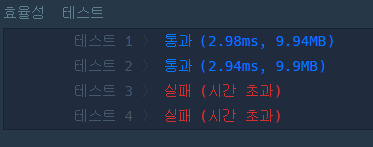

e.g. $O(n)\,\text{vs}\,O(1)$

> Suppose that we want to find out whether a specific person is in our participant list:

```python
# python.list
participant_list = ['Lionel', 'LeBron', 'Heungmin', 'Shohei', 'Roger', ...]
print('Heungmin' in participant_list)
```

```python
# python.set
participant_set = {'Lionel', 'LeBron', 'Heungmin', 'Shohei', 'Roger', ...} # set(participant_list)
print('Heungmin' in participant_set)
```

**There might be appropriate data structures for different type of problems...!!**

## Ⅱ. Hash Table

### Hash

: 임의의 길이의 데이터를 고정된 길이의 데이터로

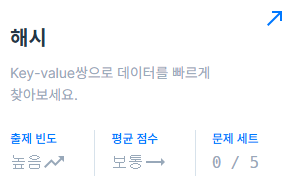

### e.g. Arranging Books

<center>

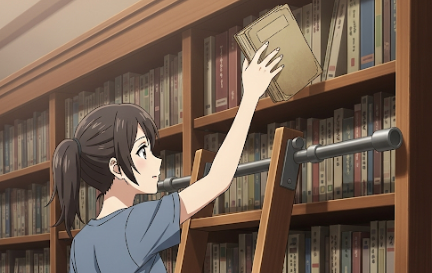

Image generated by Google: Gemini
</center>

> A librarian wants a simple way to arrange and look up books.
>
> -> to prepare **26 bookshelves**, which is the number of Alphabets, and **label each one with a letter from A to Z**.

* **New books of this week(Key)**: *Dual Brain*, *Justice*, *The Tipping Point*, *Future Self*

* **(Librarian-Custom) Hash Function**: returns Hash Value(the first letter of a title)

```python
"""
"Dual Brain" --|HASH FUNCTION|--> "D"
"Justice"    --|HASH FUNCTION|--> "J"
"""
```

* **Value**: an actual location of a book.

```python
"""
"Dual Brain" --> "D" --> "put it on the Bookshelf D"
"Justice"    --> "J" --> "put it on the Bookshelf J"
"""
```

**Case 1. A new book of the next week: *Same as Ever***
* No need to check every spaces of bookshelves
* Just to check the first letter *S* and put it on **Bookshelf S**

**Case 2. A customer wants to find a book titled *Justice***
* Just to search only a single **Bookshelf J**

**Case 3. New books of the week after next: *The Money Strategy*, *The Essays of Warren Buffett*, ...**

: Bookshelf T Full --> **HASH COLLISION!!**

* Hash Collision: a case **where different input data result in the same hash value**

    * Scenario 1: **Rearranging** within Bookshelf T

    * Scenario 2: **Subshelf for T**

#### cf. HASH FUNCTION and HASH COLLISION in python

In [17]:
help(hash)

Help on built-in function hash in module builtins:

hash(obj, /)
    Return the hash value for the given object.

    Two objects that compare equal must also have the same hash value, but the
    reverse is not necessarily true.



In [ ]:
dict1 = {'key1' : 'value1', 'key2' : 'value2'}
hash('key1')   # --> key1.__hash__()  --> return hash value

In [ ]:
# This means value1 in -3497923443164693627 index(w/ mod) of virtual array

### Hash Table

1. Data Structures with Hashing

2. Key --|HASH FUNCTION|--> idx --> Value

3. Super Fast Search of Key-Value-paired data

4. $O(1)$ on average

#### Dictionary
```python
dict1 = {key1: val1, key2: val2}
dict2 = dict(key1 = val1, key2 = val2)
```

#### Set
```python
set1 = set([1, 2, 3, 4])
set2 = {1, 2, 3, 4}
```

#### collections.Counter
```python
from collections import Counter

counts = Counter(iterable)
counts = Counter(a = 4, b = 2, c = 0, d = -2 ...)
```

In [18]:
from collections import Counter

my_list = ['apple', 'banana', 'apple', 'orange', 'banana', 'apple']
fruit_counts = Counter(my_list)
print(fruit_counts)

Counter({'apple': 3, 'banana': 2, 'orange': 1})


In [19]:
print(fruit_counts['apple'])
print(fruit_counts['strawberry'])   # no KeyError

3
0


In [20]:
my_string = "hello world"
char_counts = Counter(my_string)
print(char_counts)

Counter({'l': 3, 'o': 2, 'h': 1, 'e': 1, ' ': 1, 'w': 1, 'r': 1, 'd': 1})


In [21]:
char_counts.update(['a', 'd'])
print(char_counts)

Counter({'l': 3, 'o': 2, 'd': 2, 'h': 1, 'e': 1, ' ': 1, 'w': 1, 'r': 1, 'a': 1})


In [22]:
counts = Counter({'a': 3, 'b': 2})
print(list(counts.elements()))

['a', 'a', 'a', 'b', 'b']


In [ ]:
fruit_counts = Counter({'apple': 3, 'banana': 2, 'orange': 1})
print(fruit_counts.most_common(2))
print(fruit_counts.most_common())

[('grape', 99999), ('apple', 3)]
[('grape', 99999), ('apple', 3), ('banana', 2), ('orange', 1)]


In [27]:
c1 = Counter(a=4, b=2, c=0, d=-2)
c2 = Counter(a=1, b=2, c=3, d=4)
print(c1 + c2)
print()
print(c1 - c2)  # 0 or negative numbers might be excluded from the output

Counter({'a': 5, 'b': 4, 'c': 3, 'd': 2})

Counter({'a': 3})


#### collections.defaultdict
```python
from collection import defaultdict

my_dict = defaultdict('any of' list, int, set, lambda: 'string')
```

In [ ]:
from collections import defaultdict

list_dict = defaultdict(list)
# list_dict['fruits'].append('apple')   # no KeyError
# list_dict
# list_dict['fruits'].append('banana')
# list_dict

defaultdict(list, {'fruits': ['apple']})

In [ ]:
int_dict = defaultdict(int)
int_dict['count_a'] += 1  # no KeyError
int_dict
int_dict['count_b']    # no KeyError
int_dict

defaultdict(int, {'count_a': 1, 'count_b': 0})

In [28]:
colors = [('apple', 'red'), ('banana', 'yellow'), ('cherry', 'red'), ('orange', 'orange')]
colors_by_name = defaultdict(list)
for name, color in colors:
    colors_by_name[name].append(color)
colors_by_name

defaultdict(list,
            {'apple': ['red'],
             'banana': ['yellow'],
             'cherry': ['red'],
             'orange': ['orange']})

In [29]:
word_counts = defaultdict(int)
for word in "this is a sample sentence".split():
    word_counts[word] += 1
word_counts

defaultdict(int, {'this': 1, 'is': 1, 'a': 1, 'sample': 1, 'sentence': 1})

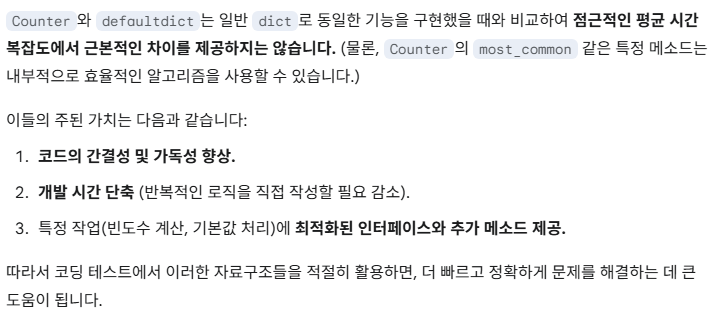

### To sum up:

* When handling **key-value-paired data**.

* When managing data with **string-type keys**.

* When using **keys without duplication**.

## Ⅲ. Queue & Stack:

### Queue: FIFO(First-in, First-out)

* Print queue of printer

* Customer Requests Processing Sequence of CS Team.

**Terms**

* Enqueue

* Dequeue

* Peek

* IsEmpty

* IsFull(if fixed queue)

### Stack: LIFO(Last-in, First-out)

* Back button of Web Browser

* Undo

**Terms**

* Push

* Pop

* Peek

* IsEmpty

### Implementing Queue and Stack by `list`

**Stack**

* push: `list.append(item)` -> $O(1)$

* pop: `list.pop()`  -> $O(1)$

efficient for using `list` as Stack

**Queue**

* enqueue: `list.append(item)`  -> $O(1)$

* dequeue: `list.pop(0)`  -> $O(n)$

quite inefficient for using `list` as Queue

### A best way to implement Queue and Stack:

```python
from collections import deque
```

#### `collections.deque`(Double-ended Queue)

* good at insertion and removal of the first element.

#### Methods

* `append(x)` & `appendleft(x)`

* `pop()` & `popleft()`

* `extend(iterable)` & `extendleft(iterable)`

* `insert(idx, val)`

* `rotate(n)`

* `reverse()`

* `clear()`

In [30]:
from collections import deque

queue = deque([1, 2, 3, 4, 5])
queue_r = deque([1, 10, 100, 1000, 10000, 100000])

In [35]:
queue_r.rotate(-3)
queue_r

deque([1, 10, 100, 1000, 10000, 100000])

#### Attributes

* `maxlen`

In [36]:
fixed_queue = deque([1, 2, 3], maxlen=3)

deque(['python', 2, 3], maxlen=3)

#### Empirical Research: `list` vs `deque`

> [프로그래머스: 올바른 괄호](https://school.programmers.co.kr/learn/courses/30/lessons/12909)

## Ⅳ. Heap & Priority Queue

### Heap

<center>

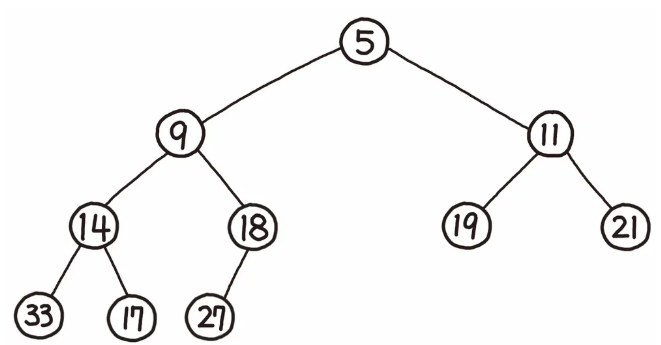

image from **파이썬 알고리즘 인터뷰**

</center>

* tree-like data structure

* Heap property
    * Min-Heap
        * Every parent nodes is less than its child nodes.
        * Root node is the smallest.
  
    * Max-Heap
        * Every parent nodes is greater than its child nodes.
        * Root node is the largest.

```python
import heapq   # default: Min-Heap
```

In [41]:
import heapq

heap = []  # list

heapq.heappush(heap, 3)
heapq.heappush(heap, 1)
heapq.heappush(heap, 4)
heapq.heappush(heap, 1)
heapq.heappush(heap, 5)
print(f'Heap: {heap}', type(heap))

Heap: [1, 1, 4, 3, 5] <class 'list'>


In [42]:
# heapq.heappop(list)
smallest = heapq.heappop(heap)
print(f"The smallest element: {smallest}")
print(f"Heap after pop: {heap}")

The smallest element: 1
Heap after pop: [1, 3, 4, 5]


In [43]:
smallest_peek = heap[0]
print(f"The smallest element (peek): {smallest_peek}")

The smallest element (peek): 1


In [44]:
# heapq.heapify(list)
data = [5, 2, 9, 1, 5, 6]
heapq.heapify(data)
print(f"List to Heap: {data}. Type: {type(data)}")

List to Heap: [1, 2, 6, 5, 5, 9]. Type: <class 'list'>


In [45]:
# heapq.heapreplace(list, val)
replaced = heapq.heapreplace(data, 3)
print(f"The smallest element: {replaced}")
print(f"Heap after replacement: {data}")

The smallest element: 1
Heap after replacement: [2, 3, 6, 5, 5, 9]


In [47]:
# heapq.nlargest(n, list)
large_numbers = heapq.nlargest(3, [5, 2, 9, 1, 5, 6])
print(f"3 largest elements: {large_numbers}")

3 largest elements: [9, 6, 5]


In [48]:
small_numbers = heapq.nsmallest(3, [5, 2, 9, 1, 5, 6])
print(f"3 smallest elements: {small_numbers}")

3 smallest elements: [1, 2, 5]


#### e.g. Heap

[LeetCode: Last Stone Weight](https://leetcode.com/problems/last-stone-weight/)

### Priority Queue

* priority on each elements

* First priority out

In [51]:
priority_queue_min = []
heapq.heappush(priority_queue_min, (3, 'task A'))
heapq.heappush(priority_queue_min, (1, 'task C'))
heapq.heappush(priority_queue_min, (1, 'task B', '!!important!!'))
heapq.heappush(priority_queue_min, (5, 'task D'))
priority_queue_min

[(1, 'task B', '!!important!!'), (3, 'task A'), (1, 'task C'), (5, 'task D')]

In [52]:
while priority_queue_min:
    priority, *rest = heapq.heappop(priority_queue_min)
    print(f"Processing task with priority {priority}: {rest}")

Processing task with priority 1: ['task B', '!!important!!']
Processing task with priority 1: ['task C']
Processing task with priority 3: ['task A']
Processing task with priority 5: ['task D']


In [53]:
priority_queue_max = []
heapq.heappush(priority_queue_max, (-3, 'task X'))
heapq.heappush(priority_queue_max, (-1, 'task Y'))
heapq.heappush(priority_queue_max, (-5, 'task Z'))
priority_queue_max

[(-5, 'task Z'), (-1, 'task Y'), (-3, 'task X')]

In [54]:
while priority_queue_max:
    neg_priority, task = heapq.heappop(priority_queue_max)
    priority = -neg_priority
    print(f"Processing task with priority {priority}: {task}")

Processing task with priority 5: task Z
Processing task with priority 3: task X
Processing task with priority 1: task Y


#### Easier Way
```python
from queue import PriorityQueue
```

In [60]:
from queue import PriorityQueue

pq = PriorityQueue()
pq.put((3, 'apple'))
pq.put((1, 'banana'))
pq.put((2, 'cherry'))
print(list(pq.queue))

[(1, 'banana'), (3, 'apple'), (2, 'cherry')]


In [56]:
while not pq.empty():
    priority, item = pq.get()
    print(f"Processing item with priority {priority}: {item}")

Processing item with priority 1: banana
Processing item with priority 2: cherry
Processing item with priority 3: apple


### cf. Heap Sort $O(n \log n)$

* Unstable sorting algorithm using Heap

In [ ]:
def heap_sort(a):
    # Min-Heap에서 Root Node 만 계속 빼내자 -> Ascending Order
    heap = []
    for i in a:
        heapq.heappush(heap, i)
    for i in range(len(a)):
        a[i] = heapq.heappop(heap)

    return a

In [ ]:
k = heap_sort([8,1,5,9770,3,57,64,1248,999])
k

### To Sum Up:

* Heap: to search or manage **minimum value or maximum value efficiently.**

* Priority Queue: to get **the most(or the less) important tasks repeatedly.**

## Ⅴ. Appendix: methods of `dict` and `set`

### Dictionary

* `dict[key]`: to search the value of the key. `KeyError` if no key.

* `dict.get(key, default_val)`:  to search the value of the key. return `default_value` if no key. If no setting of `default_val` and no key, return `None`

* `dict.setdefault(key, default_val)`: to return the value of the key. If no key, add `(key:default_val)` pair and return `default_val`.

* `dict[key] = value`: to add a new item or modify the value of the existing key.

* `del dict[key]`: to delete the pair.

* `dict.pop(key)`: to return the value, and get rid of the pair. `KeyError` if no key.

* `dict.pop(key, default_val)`: to return the value, and get rid of the pair. If no key, `return default_val`.

* `dict.popitem()`: dictionary version of `list.pop()`. **LIFO Approach(Python 3.7+)**.

* `dict.clear()`: to get rid of every items of the dictionary

* `key in dict`: to return `bool`

* `dict.keys()`, `dict.values()`, `dict.items()`: return `view` objects.

* `for key in d`: to loop keys

* `my_dict = {k:v for k, v in iterable}`: dictionary comprehension

* `dict1.update(dict2)`: to add `dict2.items()` to `dict1`

### Set

* `set.add(val)`

* `set.update(*args: iterable)`

* `set.remove(val)`: if no val: `KeyError`

* `set.discard(val)`: No error even if no val.

* `set.pop()`: to get rid of a random val and return it. if set is empty: `KeyError`

* `set.clear()`

* `val in set`

* `set1 | set2`: `set1.union(set2)`

* `set1 & set2`: `set1.intersection(set2)`

* `set1 - set2`: `set1.difference(set2)`

* `set1 ^ set2`: `set1.symmetric_difference(set2)`

* `set1.issubset(set2)`: `True` if $\text{set1}\,\subseteq\,\text{set2}$.

* `set1 <= set2`: same as above

* `set1 < set2`: True if Proper Subset

* `set2.issuperset(set1)`: `True` if $\text{set1}\,\subseteq\,\text{set2}$.

* `{val for i in iterable}`: set comprehension